# Chespeake Bay Project Code

#Data Preprocessing
Getting data cleaned up as well as subsetting data by year to narrow scope of the project.


In [ ]:
# Package install for all code
import pandas as pd

!pip install rasterio matplotlib

import rasterio
import matplotlib.pyplot as plt

import numpy as np

import geopandas as gpd
from shapely.geometry import Point

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 46.4 MB/s eta 0:00:00


In [ ]:
# Data downloaded directly from laptop

monitor_event = pd.read_csv('MonitorEvent.csv')

station = pd.read_csv('Station.csv')

water_quality = pd.read_csv('WaterQuality.csv', low_memory=False)

wq_plus = pd.read_csv('waterquality2.csv', low_memory=False)

In [ ]:
water_quality.head()
wq_plus.head()

CBSeg2003   EventId  Cruise Program Project Agency Source Station  \
0    CB1TF   487674.0  BAY783    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
1    CB1TF   492900.0  BAY762    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
2    CB1TF   492900.0  BAY762    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
3    CB1TF   492900.0  BAY762    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
4    CB1TF   492900.0  BAY762    TWQM    MAIN  MDDNR  MDDNR   CB2.1   

  SampleDate SampleTime  ...  Unit  Method  Lab  Problem PrecisionPC BiasPC  \
0   12/23/20   10:52:00  ...  MG/L    F01   NaN      NaN         NaN    NaN   
1    2/12/20   10:37:00  ...  MG/L    F01   NaN      NaN         NaN    NaN   
2    2/12/20   10:37:00  ...  MG/L    F01   NaN      NaN         NaN    NaN   
3    2/12/20   10:37:00  ...  MG/L    F01   NaN      NaN         NaN    NaN   
4    2/12/20   10:37:00  ...  MG/L    F01   NaN      NaN         NaN    NaN   

  Details  Latitude  Longitude  TierLevel  
0     NaN  39.44149  -76.02599         T3  
1     NaN  39.44149  -76.02599         T3  
2     NaN  39.44149  -76.02599         T3  
3     NaN  39.44149  -76.02599         T3  
4     NaN  39.44149  -76.02599         T3  

[5 rows x 30 columns]

In [ ]:
print(water_quality.columns)

Index(['CBSeg2003', 'EventId', 'Cruise', 'Program', 'Project', 'Agency',
       'Source', 'Station', 'SampleDate', 'SampleTime', 'TotalDepth',
       'UpperPycnocline', 'LowerPycnocline', 'Depth', 'Layer', 'SampleType',
       'SampleReplicateType', 'Parameter', 'Qualifier', 'MeasureValue', 'Unit',
       'Method', 'Lab', 'Problem', 'PrecisionPC', 'BiasPC', 'Details',
       'Latitude', 'Longitude', 'TierLevel'],
      dtype='object')


In [ ]:
# Adding a leading zero to single-digit years
water_quality['SampleDate'] = water_quality['SampleDate'].str.replace(r"(\d{1,2}/\d{1,2}/)(\d{1})(?!\d)", r"\g<1>0\2", regex=True)
wq_plus['SampleDate'] = wq_plus['SampleDate'].str.replace(r"(\d{1,2}/\d{1,2}/)(\d{1})(?!\d)", r"\g<1>0\2", regex=True)

# Convert the 'SampleDate' column to datetime format
water_quality['SampleDate'] = pd.to_datetime(water_quality['SampleDate'], format='%m/%d/%y', errors='coerce')

# Filter data from the year 2021
water_quality_2021 = water_quality[water_quality['SampleDate'].dt.year == 2021]

# Display the filtered 2021 data
print(water_quality_2021)

# Same conversions done for the additional data found stored in wq_plus
wq_plus['SampleDate'] = pd.to_datetime(wq_plus['SampleDate'], format='%m/%d/%y')
wq_plus_2021 = wq_plus[wq_plus['SampleDate'].dt.year == 2021]
print(wq_plus_2021)

wq_plus_2022 = wq_plus[wq_plus['SampleDate'].dt.year == 2022]
print(wq_plus_2022)


       CBSeg2003  EventId  Cruise Program Project Agency Source Station  \
665       CB1TF    588081  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
666       CB1TF    588082  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
667       CB1TF    588081  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
668       CB1TF    588082  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
669       CB1TF    588060  BAY789    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
...          ...      ...     ...     ...     ...    ...    ...     ...   
524100    CB7PH    487633  BAY785    TWQM    MAIN  VADEQ    ODU  CB7.3E   
524101    CB7PH    487637  BAY785    TWQM    MAIN  VADEQ    ODU  CB7.4N   
524102    CB7PH    487627  BAY785    TWQM    MAIN  VADEQ    ODU   CB7.2   
524103    CB7PH    487629  BAY785    TWQM    MAIN  VADEQ    ODU  CB7.2E   
524104    CB7PH    487644  BAY785    TWQM    MAIN  VADEQ    ODU   EE3.5   

       SampleDate SampleTime  ...  Unit  Method  Lab  Problem PrecisionPC  \
665    2021-02-10   11

In [ ]:
# Filter data from the year 2022
water_quality_2022 = water_quality[water_quality['SampleDate'].dt.year == 2022]

# Display the filtered 2022 data
print(water_quality_2022)

       CBSeg2003  EventId  Cruise Program Project Agency Source Station  \
778       CB1TF    611565  BAY810    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
779       CB1TF    611566  BAY810    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
780       CB1TF    611565  BAY810    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
781       CB1TF    611566  BAY810    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
782       CB1TF    611582  BAY812    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
...          ...      ...     ...     ...     ...    ...    ...     ...   
528438    CB7PH    621696     NaN    TWQM    MAIN  VADEQ    ODU   CB7.2   
528439    CB7PH    621694     NaN    TWQM    MAIN  VADEQ    ODU  CB7.1N   
528440    CB7PH    621694     NaN    TWQM    MAIN  VADEQ    ODU  CB7.1N   
528441    CB7PH    621694     NaN    TWQM    MAIN  VADEQ    ODU  CB7.1N   
528442    CB7PH    621693     NaN    TWQM    MAIN  VADEQ    ODU   CB7.1   

       SampleDate SampleTime  ...  Unit  Method  Lab  Problem PrecisionPC  \
778    2022-02-09   10

In [ ]:
# Combine 2021 and 2022 water quality data
combined_water_quality = pd.concat([water_quality_2021, water_quality_2022], ignore_index=True)

# Combining additional wq paramters from wq_plus into combined_water_quality
combined_water_quality = pd.concat([combined_water_quality, wq_plus_2021, wq_plus_2022], ignore_index=True)

# Display the combined data
print(combined_water_quality)

      CBSeg2003   EventId  Cruise Program   Project Agency Source   Station  \
0        CB1TF   588081.0  BAY786    TWQM      MAIN  MDDNR  MDDNR     CB1.1   
1        CB1TF   588082.0  BAY786    TWQM      MAIN  MDDNR  MDDNR     CB2.1   
2        CB1TF   588081.0  BAY786    TWQM      MAIN  MDDNR  MDDNR     CB1.1   
3        CB1TF   588082.0  BAY786    TWQM      MAIN  MDDNR  MDDNR     CB2.1   
4        CB1TF   588060.0  BAY789    TWQM      MAIN  MDDNR  MDDNR     CB2.1   
...         ...       ...     ...     ...       ...    ...    ...       ...   
50073    CB8PH   620348.0  BAY815    TWQM      MAIN  VADEQ    ODU    CB8.1E   
50074    CB8PH   620347.0  BAY812    TWQM      MAIN  VADEQ    ODU    CB8.1E   
50075    CB8PH   620344.0  BAY815    TWQM      MAIN  VADEQ    ODU     CB7.4   
50076    CB8PH   620343.0  BAY812    TWQM      MAIN  VADEQ    ODU     CB7.4   
50077    CB8PH   629780.0  PART22    TWQM  PARTTRIB    CMC   PVMN  PVMN.HB3   

      SampleDate SampleTime  ...  Unit  Method  Lab

In [ ]:
print(combined_water_quality.columns)

Index(['CBSeg2003', 'EventId', 'Cruise', 'Program', 'Project', 'Agency',
       'Source', 'Station', 'SampleDate', 'SampleTime', 'TotalDepth',
       'UpperPycnocline', 'LowerPycnocline', 'Depth', 'Layer', 'SampleType',
       'SampleReplicateType', 'Parameter', 'Qualifier', 'MeasureValue', 'Unit',
       'Method', 'Lab', 'Problem', 'PrecisionPC', 'BiasPC', 'Details',
       'Latitude', 'Longitude', 'TierLevel'],
      dtype='object')


In [ ]:
# Checking na values in water quality df
combined_water_quality.isna().sum()

CBSeg2003                  0
EventId                    0
Cruise                  4346
Program                    0
Project                    0
Agency                     0
Source                     0
Station                    0
SampleDate                 0
SampleTime                 0
TotalDepth               515
UpperPycnocline        20987
LowerPycnocline        20987
Depth                      0
Layer                      0
SampleType                 0
SampleReplicateType        0
Parameter                  0
Qualifier              49929
MeasureValue              11
Unit                       0
Method                     0
Lab                    42488
Problem                49940
PrecisionPC            50078
BiasPC                 50078
Details                49331
Latitude                   0
Longitude                  0
TierLevel                  0
dtype: int64

In [ ]:
# saving anaysis ready data
combined_water_quality.to_csv('combined_water_quality.csv', index=False)

# Preliminary Visualizations
## Prelminary visulations include genertaing figures for the LANDSAT imagery bands.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


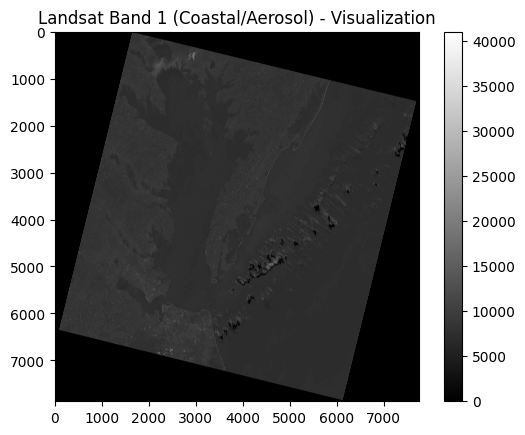

In [ ]:
#Landsat Imagery Band 1
#1
band1_file = '/content/drive/MyDrive/tiff/2022_04_B1.TIF'

with rasterio.open(band1_file) as src:
    band1 = src.read(1)  # Read the SWIR band

plt.imshow(band1, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 1 (Coastal/Aerosol) - Visualization')
plt.show()

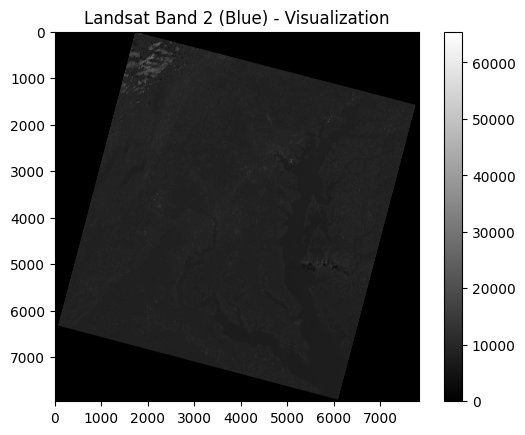

In [ ]:
#Landsat Imagery Band 2
band2_file = '/content/drive/MyDrive/tiff/2021_12_B2.TIF'

with rasterio.open(band2_file) as src:
    band2 = src.read(1)  # Read the SWIR band

plt.imshow(band2, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 2 (Blue) - Visualization')
plt.show()

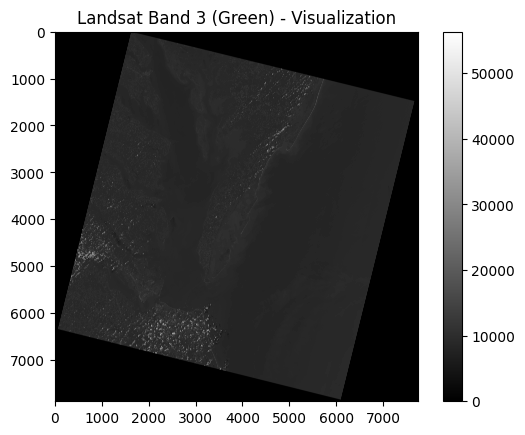

In [ ]:
#Landsat Imagery Band 3
#3
band3_file = '/content/drive/MyDrive/tiff/2022_07_B3.TIF'

with rasterio.open(band3_file) as src:
    band3 = src.read(1)  # Read the SWIR band

plt.imshow(band3, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 3 (Green) - Visualization')
plt.show()


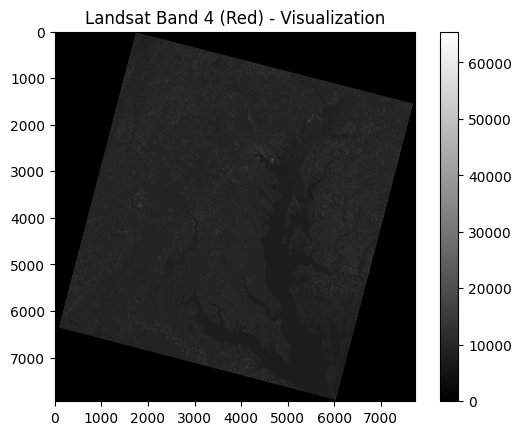

In [ ]:
# Landsat Imagery Bands 4

band4_file = '/content/drive/MyDrive/tiff/2021_11_B4.TIF'

with rasterio.open(band4_file) as src:
    band4 = src.read(1)  # Read the Red band

# Plot the band
plt.imshow(band4, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 4 (Red) - Visualization')
plt.show()


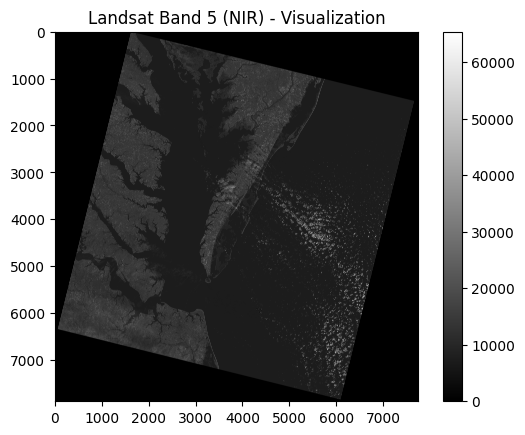

In [ ]:
#Landsat Imagery Band 5
band5_file = '/content/drive/MyDrive/tiff/2022_12_B5.TIF'

with rasterio.open(band5_file) as src:
    band5 = src.read(1)  # Read the SWIR band

plt.imshow(band5, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 5 (NIR) - Visualization')
plt.show()

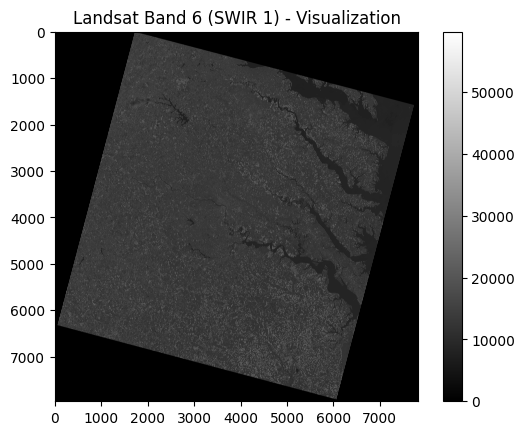

In [ ]:
#Landsat Imagery Band 6
band6_file = '/content/drive/MyDrive/tiff/2021_04_B6.TIF'

with rasterio.open(band6_file) as src:
    band6 = src.read(1)  # Read the SWIR band

plt.imshow(band6, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 6 (SWIR 1) - Visualization')
plt.show()

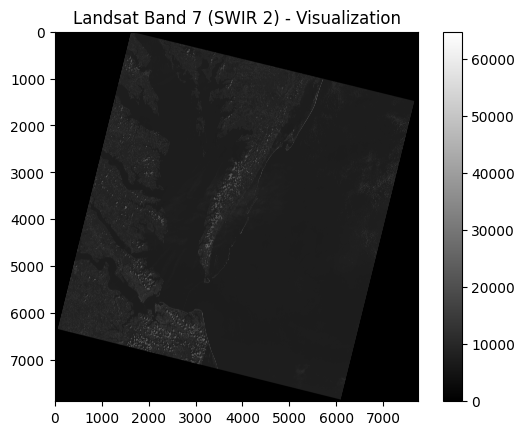

In [ ]:
#Landsat Imagery Band 7
band7_file = '/content/drive/MyDrive/tiff/2021_08_B7.TIF'

with rasterio.open(band7_file) as src:
    band7 = src.read(1)  # Read the SWIR 2 band

plt.imshow(band7, cmap='gray')
plt.colorbar()
plt.title('Landsat Band 7 (SWIR 2) - Visualization')
plt.show()

In [ ]:
print(band4.shape)
print(band5.shape)

(7941, 7741)
(7881, 7751)


<ipython-input-20-02abb0f298eb>:10: RuntimeWarning: invalid value encountered in divide
  NDVI = (band5_resized - band4) / (band5_resized + band4)


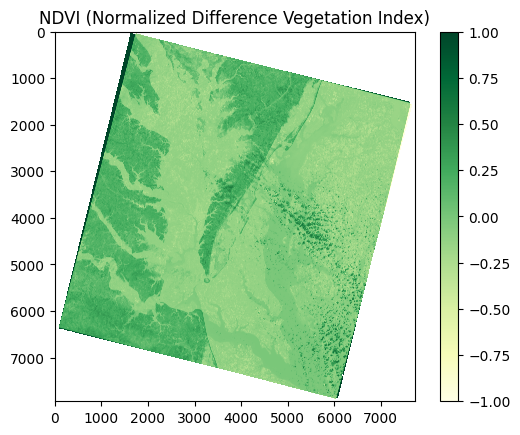

In [ ]:
# NDVI
band3 = band3.astype(np.float32)
band5 = band5.astype(np.float32)

from skimage.transform import resize

# Resize band5 (NIR) to match the shape of band4 (Red)
band5_resized = resize(band5, band4.shape, mode='constant', preserve_range=True)

NDVI = (band5_resized - band4) / (band5_resized + band4)

# Plot the NDVI
plt.imshow(NDVI, cmap='YlGn')
plt.colorbar()
plt.title('NDVI (Normalized Difference Vegetation Index)')
plt.show()


Shape of Green Band (Band 3): (7881, 7751)
Shape of NIR Band (Band 5): (7881, 7751)


<ipython-input-21-ec3185584779>:11: RuntimeWarning: invalid value encountered in divide
  NDWI = (band3 - band5) / (band3 + band5)


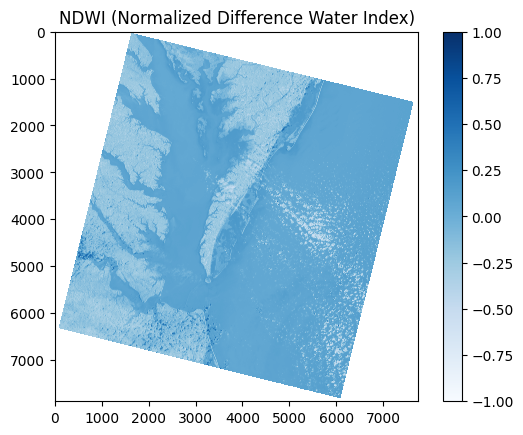

In [ ]:
# NDWI
print(f"Shape of Green Band (Band 3): {band3.shape}")
print(f"Shape of NIR Band (Band 5): {band5.shape}")

from skimage.transform import resize

if band3.shape != band5.shape:
    band5 = resize(band5, band3.shape, mode='constant', preserve_range=True)

# Calculate NDWI
NDWI = (band3 - band5) / (band3 + band5)

# Plot NDWI
plt.imshow(NDWI, cmap='Blues')  # Use a blue colormap for water
plt.colorbar()
plt.title('NDWI (Normalized Difference Water Index)')
plt.show()

In [ ]:
from skimage.transform import resize
import numpy as np

# Resize NDVI to match the shape of NDWI (or vice versa)
if NDWI.shape != NDVI.shape:
    NDVI_resized = resize(NDVI, NDWI.shape, mode='constant', preserve_range=True)

# Combine the arrays
satellite_data = NDWI + NDVI_resized

In [ ]:
# saving analysis ready data - satellite imagery
np.save('satellite_data.npy', satellite_data)

# saving analysis ready data - bands
np.save('band1.npy', band1)
np.save('band2.npy', band2)
np.save('band3.npy', band3)
np.save('band4.npy', band4)
np.save('band5.npy', band5)
np.save('band6.npy', band6)
np.save('band7.npy', band7)

# Relating In-Situ Measurements to Satellite Data

## This section focuses on converting in-situ data to match satellite data. This also includes preliminary visualizations of water quality points on landsat imagery.

In [ ]:
# Creating GeoDataFrame for combined_water_quality DataFrame
combined_water_quality['geometry'] = combined_water_quality.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Converting DataFrame to a GeoDataFrame
combined_gdf = gpd.GeoDataFrame(combined_water_quality, geometry='geometry', crs="EPSG:4326")

# Display the first few rows
print(combined_gdf.head())

  CBSeg2003   EventId  Cruise Program Project Agency Source Station  \
0    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
1    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
2    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
3    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
4    CB1TF   588060.0  BAY789    TWQM    MAIN  MDDNR  MDDNR   CB2.1   

  SampleDate SampleTime  ...  Method  Lab  Problem  PrecisionPC BiasPC  \
0 2021-02-10   11:17:00  ...    L01   CBL      NaN          NaN    NaN   
1 2021-02-10   10:37:00  ...    L01   CBL      NaN          NaN    NaN   
2 2021-02-10   11:17:00  ...    L01   CBL      NaN          NaN    NaN   
3 2021-02-10   10:37:00  ...    L01   CBL      NaN          NaN    NaN   
4 2021-03-18   14:39:00  ...    L01   CBL      NaN          NaN    NaN   

  Details  Latitude Longitude TierLevel                    geometry  
0     NaN  39.54794 -76.08481        T3  POINT (-76.08481 

In [ ]:
# Check CRS of the GeoDataFrame (WQ data)
print(combined_gdf.crs)

# Reproject WQ data to match CRS of the raster
with rasterio.open(band5_file) as src:
    raster_crs = src.crs
combined_gdf = combined_gdf.to_crs(raster_crs)

EPSG:4326


In [ ]:
# Load the NIR band raster as an example
with rasterio.open(band5_file) as src:
    # Read the raster data and transform
    band5 = src.read(1)
    transform = src.transform

# Extract values for each point
    def extract_raster_value(row, src, band):
        x, y = row['geometry'].x, row['geometry'].y  # Point coordinates
        row, col = src.index(x, y)  # Convert coordinates to row and col
        try:
            value = band[row, col]
            return value
        except IndexError:  # If the point is outside the raster bounds
            return np.nan

# Apply function to extract raster values for each point in the GeoDataFrame
    combined_gdf['Band5_Value'] = combined_gdf.apply(lambda row: extract_raster_value(row, src, band5), axis=1)

combined_gdf['NDVI'] = combined_gdf.apply(lambda row: extract_raster_value(row, src, NDVI), axis=1)


In [ ]:
with rasterio.open(band5_file) as src:
    combined_gdf = combined_gdf.to_crs(src.crs)

print(combined_gdf.head())  # Check a few rows for geometry and coordinates
print(src.bounds)           # Check the raster bounds

  CBSeg2003   EventId  Cruise Program Project Agency Source Station  \
0    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
1    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
2    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
3    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
4    CB1TF   588060.0  BAY789    TWQM    MAIN  MDDNR  MDDNR   CB2.1   

  SampleDate SampleTime  ...  Problem  PrecisionPC  BiasPC  Details  Latitude  \
0 2021-02-10   11:17:00  ...      NaN          NaN     NaN      NaN  39.54794   
1 2021-02-10   10:37:00  ...      NaN          NaN     NaN      NaN  39.44149   
2 2021-02-10   11:17:00  ...      NaN          NaN     NaN      NaN  39.54794   
3 2021-02-10   10:37:00  ...      NaN          NaN     NaN      NaN  39.44149   
4 2021-03-18   14:39:00  ...      NaN          NaN     NaN      NaN  39.44149   

  Longitude TierLevel                        geometry Band5_Value      NDVI  
0 -76.08

In [ ]:
# Check a few rows of transformed points
print(combined_gdf[['Latitude', 'Longitude', 'geometry']].head())

# Check raster bounds for reference
with rasterio.open(band5_file) as src:
    print(src.bounds)

   Latitude  Longitude                        geometry
0  39.54794  -76.08481  POINT (406792.147 4378146.808)
1  39.44149  -76.02599  POINT (411711.555 4366273.282)
2  39.54794  -76.08481  POINT (406792.147 4378146.808)
3  39.44149  -76.02599  POINT (411711.555 4366273.282)
4  39.44149  -76.02599  POINT (411711.555 4366273.282)
BoundingBox(left=316785.0, bottom=4028985.0, right=549315.0, top=4265415.0)


In [ ]:
# Ensure all points are reprojected correctly
combined_gdf = combined_gdf.to_crs("EPSG:32618")

In [ ]:
# Filter points within raster bounds
within_bounds = combined_gdf[
    (combined_gdf['geometry'].x >= src.bounds.left) &
    (combined_gdf['geometry'].x <= src.bounds.right) &
    (combined_gdf['geometry'].y >= src.bounds.bottom) &
    (combined_gdf['geometry'].y <= src.bounds.top)
]


In [ ]:
# List of file paths for Landsat bands
band_files = [band1_file, band2_file, band3_file, band4_file, band5_file, band6_file, band7_file]

for band_file in band_files:
    with rasterio.open(band_file) as src:
        # Read the raster and check bounds
        bounds = src.bounds
        print(f"Bounds for {band_file}: {bounds}")

        # Filter points within the raster bounds
        points_within_bounds = combined_gdf[
            (combined_gdf['geometry'].x >= bounds.left) &
            (combined_gdf['geometry'].x <= bounds.right) &
            (combined_gdf['geometry'].y >= bounds.bottom) &
            (combined_gdf['geometry'].y <= bounds.top)
        ]

Bounds for /content/drive/MyDrive/tiff/2022_04_B1.TIF: BoundingBox(left=313185.0, bottom=4029285.0, right=545715.0, top=4265415.0)
Bounds for /content/drive/MyDrive/tiff/2021_12_B2.TIF: BoundingBox(left=220485.0, bottom=4187985.0, right=455415.0, top=4426515.0)
Bounds for /content/drive/MyDrive/tiff/2022_07_B3.TIF: BoundingBox(left=317385.0, bottom=4028985.0, right=549915.0, top=4265415.0)
Bounds for /content/drive/MyDrive/tiff/2021_11_B4.TIF: BoundingBox(left=232785.0, bottom=4187985.0, right=465015.0, top=4426215.0)
Bounds for /content/drive/MyDrive/tiff/2022_12_B5.TIF: BoundingBox(left=316785.0, bottom=4028985.0, right=549315.0, top=4265415.0)
Bounds for /content/drive/MyDrive/tiff/2021_04_B6.TIF: BoundingBox(left=175785.0, bottom=4030185.0, right=410715.0, top=4269015.0)
Bounds for /content/drive/MyDrive/tiff/2021_08_B7.TIF: BoundingBox(left=317685.0, bottom=4028985.0, right=550215.0, top=4265415.0)


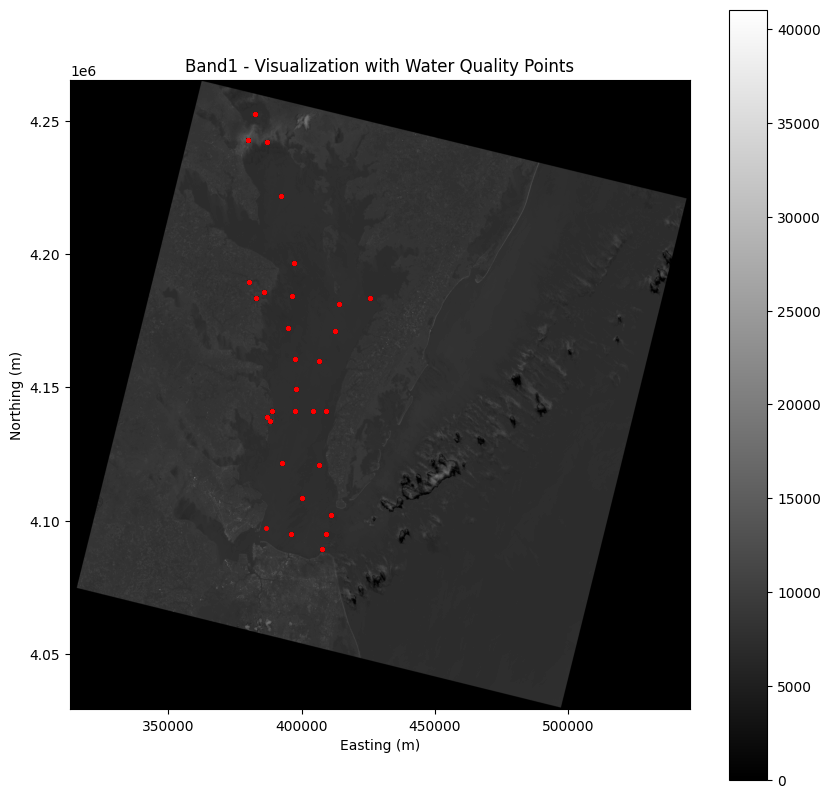

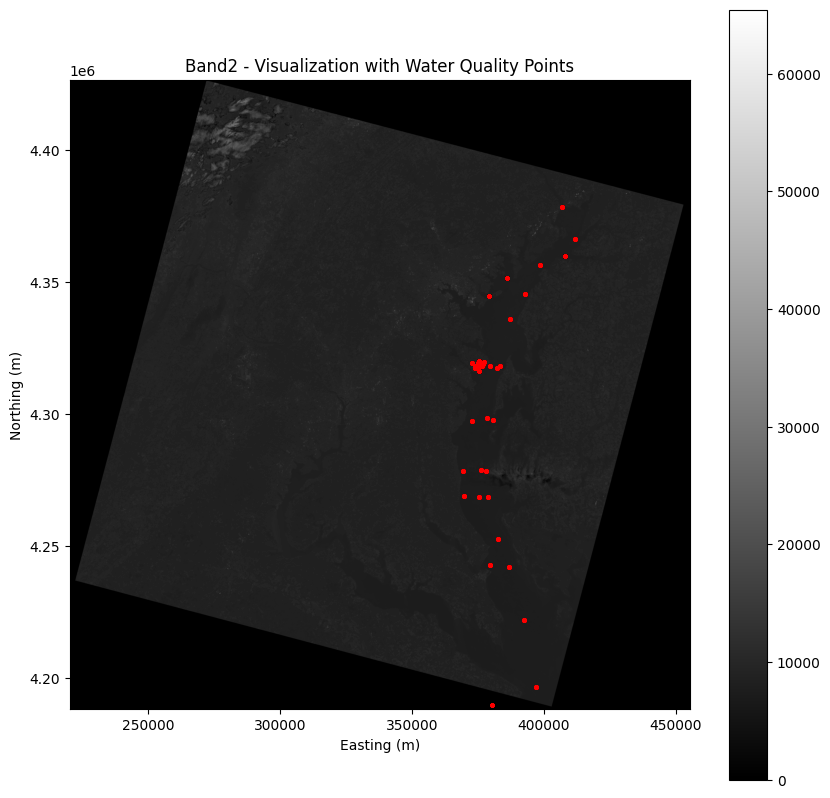

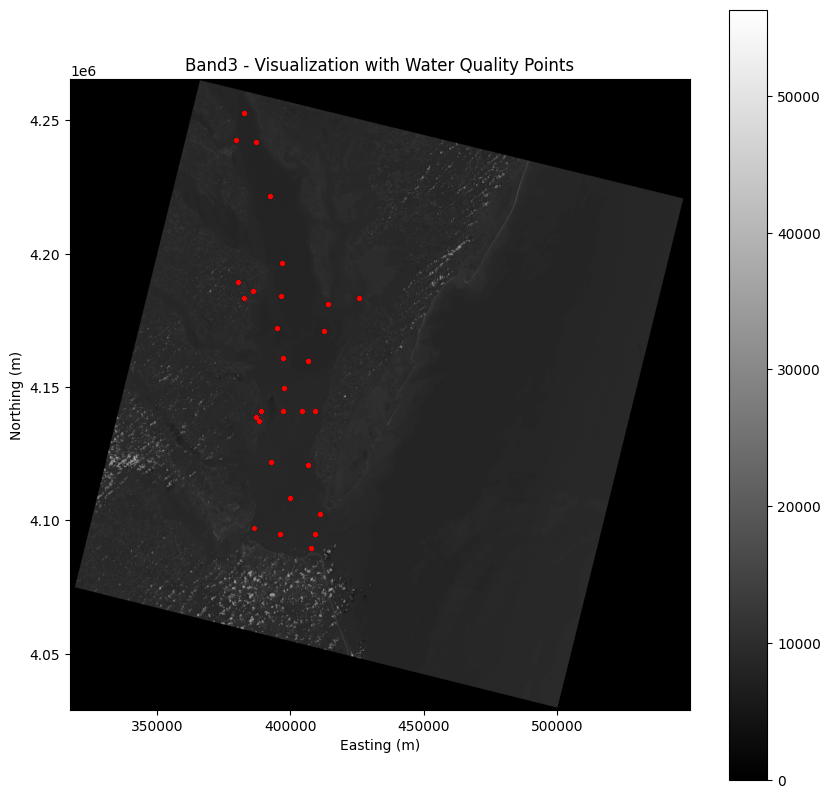

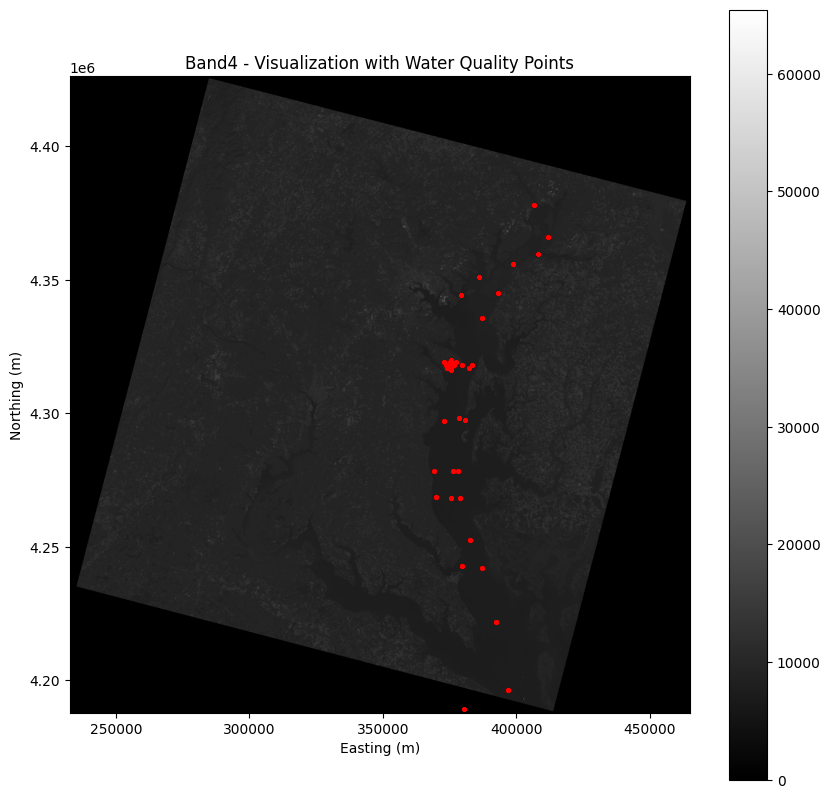

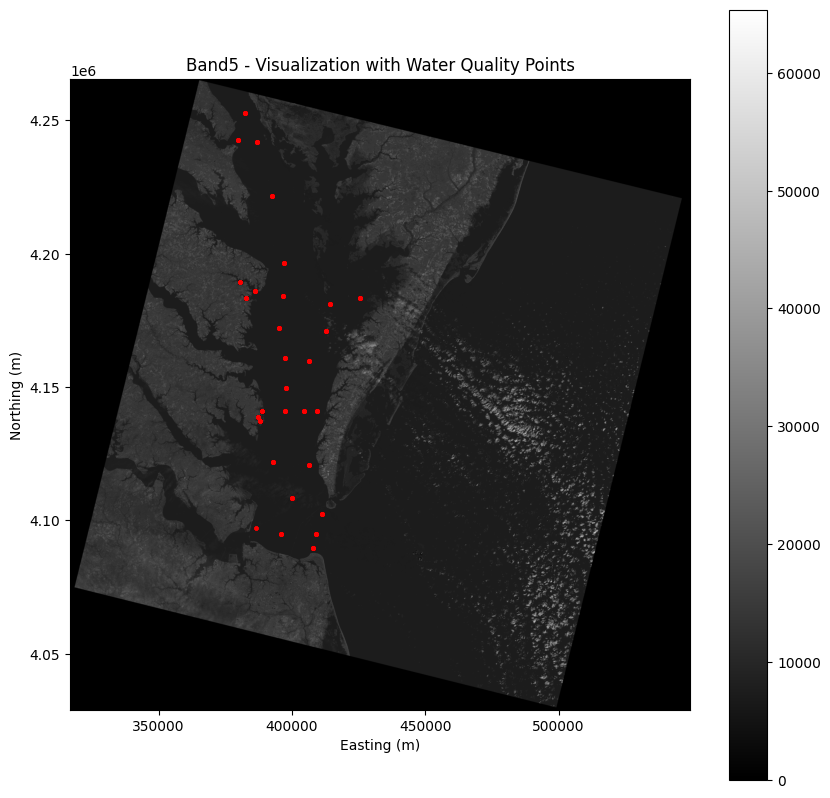

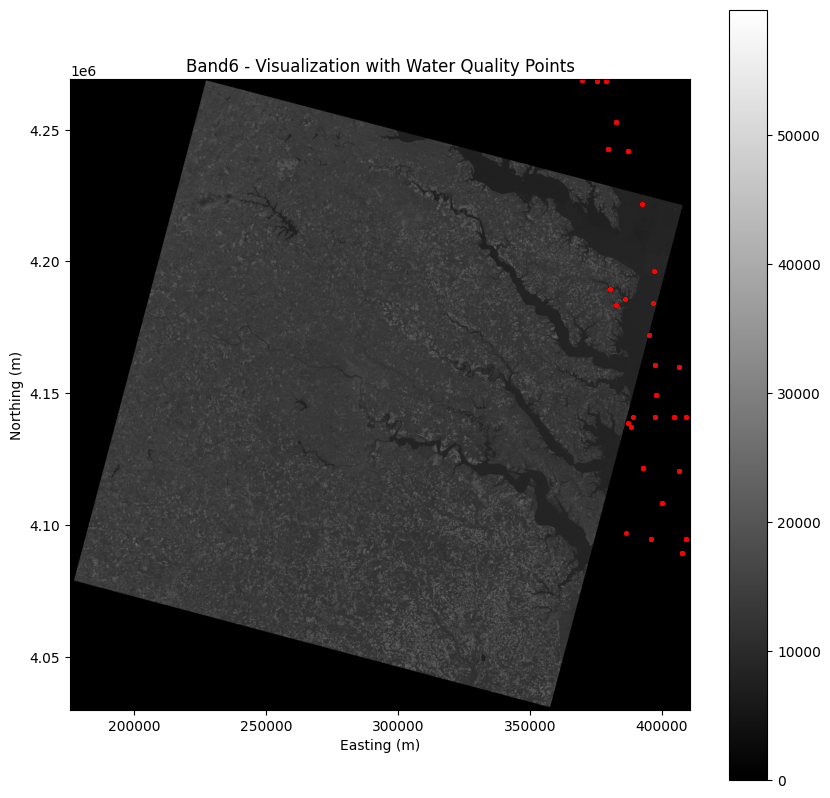

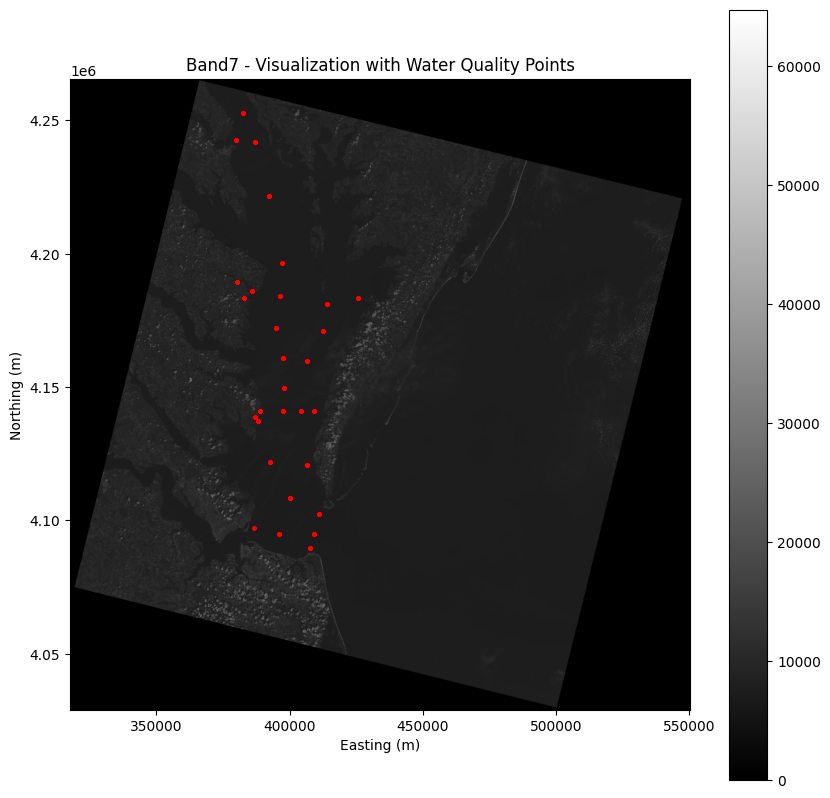

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import geopandas as gpd

# List of file paths for Landsat bands with their names for easy reference
band_files = {
    'Band1': '/content/drive/MyDrive/tiff/2022_04_B1.TIF',
    'Band2': '/content/drive/MyDrive/tiff/2021_12_B2.TIF',
    'Band3': '/content/drive/MyDrive/tiff/2022_07_B3.TIF',
    'Band4': '/content/drive/MyDrive/tiff/2021_11_B4.TIF',
    'Band5': '/content/drive/MyDrive/tiff/2022_12_B5.TIF',
    'Band6': '/content/drive/MyDrive/tiff/2021_04_B6.TIF',
    'Band7': '/content/drive/MyDrive/tiff/2021_08_B7.TIF'
}

for band_name, band_file in band_files.items():
    with rasterio.open(band_file) as src:
        # Read the raster data
        band_array = src.read(1)
        bounds = src.bounds

        # Filter points within the raster bounds
        points_within_bounds = combined_gdf[
            (combined_gdf['geometry'].x >= bounds.left) &
            (combined_gdf['geometry'].x <= bounds.right) &
            (combined_gdf['geometry'].y >= bounds.bottom) &
            (combined_gdf['geometry'].y <= bounds.top)
        ]

        # Plot raster with filtered points
        plt.figure(figsize=(10, 10))
        plt.imshow(band_array, cmap='gray', extent=(bounds.left, bounds.right, bounds.bottom, bounds.top))
        plt.colorbar()
        plt.title(f'{band_name} - Visualization with Water Quality Points')

        # Overlay filtered GeoDataFrame points
        points_within_bounds.plot(ax=plt.gca(), color='red', markersize=5, alpha=0.6)
        plt.xlabel('Easting (m)')
        plt.ylabel('Northing (m)')
        plt.show()

In [ ]:
# saving analysis ready data - combined gdf
combined_gdf.to_csv('combined_gdf.csv', index=False)

# Model Training
# This section focuses on model training and assessing the model fit / accuracy of only the in-situ measurements

In [ ]:
combined_gdf2 = combined_gdf.copy()

In [ ]:
# Pivot the data so each parameter becomes a separate column
reshaped_data = combined_gdf2.pivot_table(
    index=['CBSeg2003', 'EventId', 'Station', 'SampleDate', 'SampleTime', 'Latitude', 'Longitude', 'geometry'],
    columns='Parameter',
    values='MeasureValue'
).reset_index()

reshaped_data = reshaped_data.drop_duplicates()

# Display the first few rows of reshaped data
print(reshaped_data.head())

# Rename columns if necessary for easier access (optional)
reshaped_data.columns.name = None

Parameter CBSeg2003   EventId Station SampleDate SampleTime  Latitude  \
0            CB1TF   588001.0   CB1.1 2021-01-13   11:37:00  39.54794   
1            CB1TF   588002.0   CB2.1 2021-01-13   11:00:00  39.44149   
2            CB1TF   588015.0   CB1.1 2021-04-07   11:23:00  39.54794   
3            CB1TF   588016.0   CB2.1 2021-04-07   10:46:00  39.44149   
4            CB1TF   588037.0   CB1.1 2021-05-12   11:18:00  39.54794   

Parameter  Longitude                        geometry    CHLA         DO  \
0          -76.08481  POINT (406792.147 4378146.808)   0.737  13.600000   
1          -76.02599  POINT (411711.555 4366273.282)   0.844  13.185714   
2          -76.08481  POINT (406792.147 4378146.808)  10.235  11.520000   
3          -76.02599  POINT (411711.555 4366273.282)  10.502  11.766667   
4          -76.08481  POINT (406792.147 4378146.808)  13.617  10.880000   

Parameter      KD        PH      TN       TP  TURB_NTU      WTEMP  
0          1.4486  7.916667  1.8588  0.024

In [ ]:
# Step 1: Updated predictors and predictands

predictors_insitu = ['PH', 'TN', 'TP', 'WTEMP', 'DO', 'KD', 'TURB_NTU']
predictands_insitu = ['CHLA']  # Predicting CHLA

# Select only numeric columns for filling missing values
numeric_columns = reshaped_data[predictors_insitu + predictands_insitu].select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns with their mean
for column in numeric_columns:
    reshaped_data[column] = reshaped_data[column].fillna(reshaped_data[column].mean())

# Filter out rows with remaining missing values (if any)
data = reshaped_data[predictors_insitu + predictands_insitu].dropna()

# Check the shape of the dataset after handling missing values
print("Shape of dataset after handling missing values:", data.shape)

# Proceed with splitting predictors and predictands
X = data[predictors_insitu]
y_chla = data['CHLA']


# Normalize predictors using Z-score normalization
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 2: Train-Test Split for CHLA
X_train_chla, X_test_chla, y_train_chla, y_test_chla = train_test_split(
    X_normalized, y_chla, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Model for CHLA
rf_chla = RandomForestRegressor(random_state=42)
rf_chla.fit(X_train_chla, y_train_chla)

# Step 4: Evaluate Model for CHLA
y_pred_chla = rf_chla.predict(X_test_chla)
mae_chla = mean_absolute_error(y_test_chla, y_pred_chla)
rmse_chla = np.sqrt(mean_squared_error(y_test_chla, y_pred_chla))
r2_chla = r2_score(y_test_chla, y_pred_chla)

print("Chlorophyll-a Model Performance (CHLA):")
print(f"MAE: {mae_chla:.4f}, RMSE: {rmse_chla:.4f}, R2 Score: {r2_chla:.4f}")
print("Feature Importances (CHLA Model):", rf_chla.feature_importances_)

Shape of dataset after handling missing values: (1582, 8)
Chlorophyll-a Model Performance (CHLA):
MAE: 1.7270, RMSE: 3.5826, R2 Score: 0.5412
Feature Importances (CHLA Model): [2.22126954e-01 2.93682031e-01 8.82748011e-02 1.28246247e-01
 1.12150374e-01 1.55519593e-01 4.27598459e-19]


In [ ]:
# saving model outputs for first model
import pickle
with open('rf_chla.pkl', 'wb') as model_file:
    pickle.dump(rf_chla, model_file)

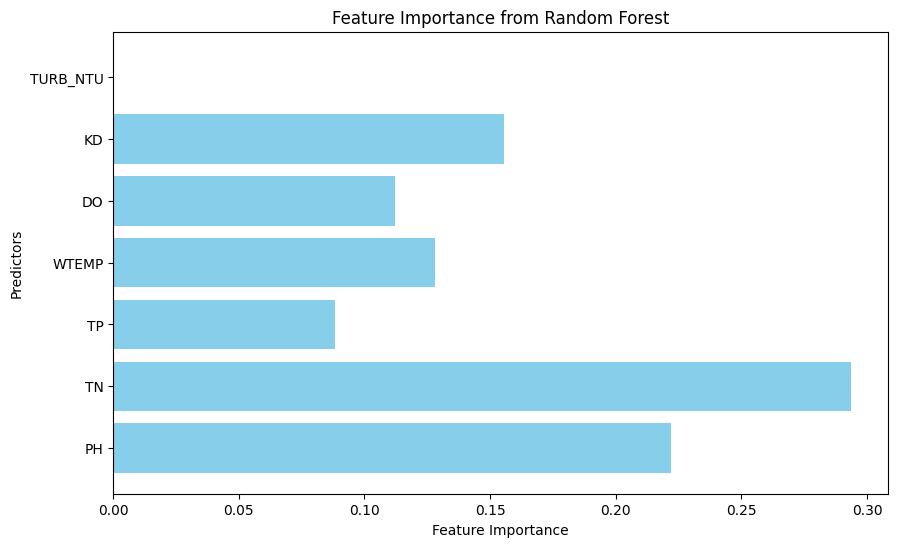

In [ ]:
# Get feature importances
importances_insitu = rf_chla.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(predictors_insitu, importances_insitu, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Predictors')
plt.title('Feature Importance from Random Forest')
plt.show()

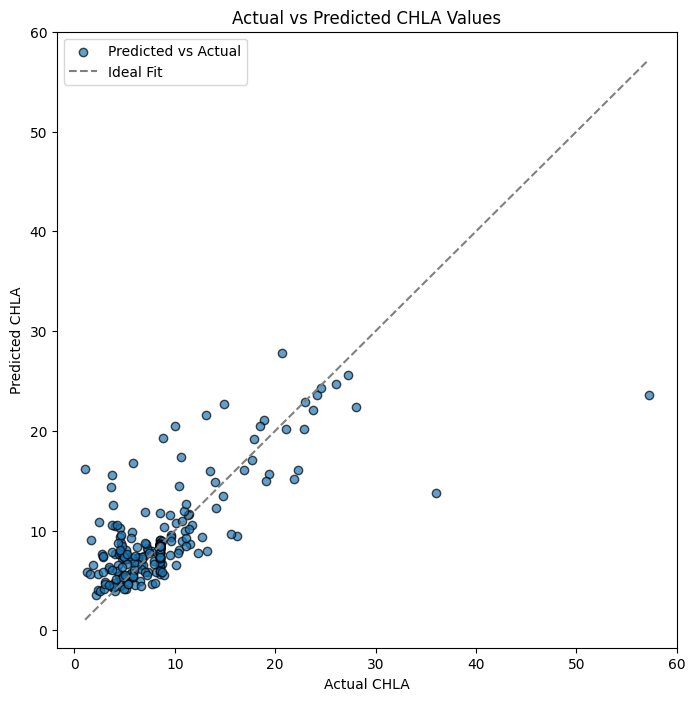

In [ ]:
# Step 5: Plotting Actual vs Predicted Values
# CHLA
plt.figure(figsize=(8, 8))
plt.scatter(y_test_chla, y_pred_chla, alpha=0.7, edgecolors='k', label='Predicted vs Actual')
plt.plot([min(y_test_chla), max(y_test_chla)], [min(y_test_chla), max(y_test_chla)], '--', color='gray', label='Ideal Fit')
plt.xlabel('Actual CHLA')
plt.ylabel('Predicted CHLA')
plt.title('Actual vs Predicted CHLA Values')
plt.legend()
plt.show()


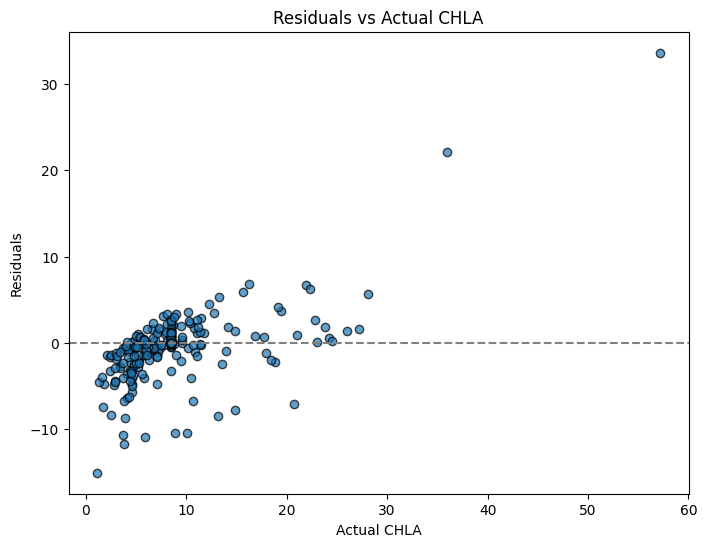

In [ ]:
# Residuals Analysis
residuals = y_test_chla - y_pred_chla

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test_chla, residuals, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Actual CHLA')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual CHLA')
plt.show()

# Model Training with In-situ measurments and Satellite data


In [ ]:
!apt install gdal-bin python3-gdal
!pip install GDAL

from osgeo import gdal

def gdal_raster_extract(gdf, raster_path, band_name="Band1"):
    """
    Use GDAL for faster raster value extraction.
    """
    dataset = gdal.Open(raster_path)
    band = dataset.GetRasterBand(1)
    transform = dataset.GetGeoTransform()

    def get_value(x, y):
        # Convert geographic coordinates to pixel indices
        px = int((x - transform[0]) / transform[1])
        py = int((y - transform[3]) / transform[5])
        if 0 <= px < dataset.RasterXSize and 0 <= py < dataset.RasterYSize:
            return band.ReadAsArray(px, py, 1, 1)[0, 0]
        return None

    gdf[band_name] = gdf['geometry'].apply(lambda geom: get_value(geom.x, geom.y))
    return gdf

# Example Trial Run: Process Band 1 using GDAL
band1_file = '/content/drive/MyDrive/tiff/2022_04_B1.TIF'
combined_gdf = gdal_raster_extract(combined_gdf, band1_file, band_name="Band1")

# Handle missing values
combined_gdf['Band1'] = combined_gdf['Band1'].fillna(0)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Get:3 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 gdal-bin amd64 3.6.4+dfsg-1~jammy0 [561 kB]
Fetched 5,055 kB in 1s (4,003 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 123632 files and directories curren

In [ ]:
# bands 2-7
raster_paths = {
    'Band2': '/content/drive/MyDrive/tiff/2021_12_B2.TIF',
    'Band3': '/content/drive/MyDrive/tiff/2022_07_B3.TIF',
    'Band4': '/content/drive/MyDrive/tiff/2021_11_B4.TIF',
    'Band5': '/content/drive/MyDrive/tiff/2022_12_B5.TIF',
    'Band6': '/content/drive/MyDrive/tiff/2021_04_B6.TIF',
    'Band7': '/content/drive/MyDrive/tiff/2021_08_B7.TIF',
}

from osgeo import gdal

def gdal_raster_extract_multiple(gdf, raster_paths):
    """
    Extract raster values from multiple bands and add them as columns to the GeoDataFrame.

    Parameters:
    - gdf: GeoDataFrame with a 'geometry' column.
    - raster_paths: Dictionary where keys are band names and values are file paths to raster files.

    Returns:
    - gdf: Updated GeoDataFrame with new columns for each band.
    """
    for band_name, raster_path in raster_paths.items():
        print(f"Processing {band_name}...")
        dataset = gdal.Open(raster_path)
        band = dataset.GetRasterBand(1)
        transform = dataset.GetGeoTransform()

        # Function to extract raster value at a single point
        def get_value(x, y):
            px = int((x - transform[0]) / transform[1])
            py = int((y - transform[3]) / transform[5])
            if 0 <= px < dataset.RasterXSize and 0 <= py < dataset.RasterYSize:
                return band.ReadAsArray(px, py, 1, 1)[0, 0]
            return None

        # Apply the extraction function to each geometry
        gdf[band_name] = gdf['geometry'].apply(lambda geom: get_value(geom.x, geom.y))

        # Handle missing values
        gdf[band_name] = gdf[band_name].fillna(0)  # Replace None with 0 or another placeholder
    return gdf

# Extract values for Bands 2–7 and add them to the GeoDataFrame
combined_gdf = gdal_raster_extract_multiple(combined_gdf, raster_paths)

# Verify the updated GeoDataFrame
print(combined_gdf[['Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7']].head())

Processing Band2...
Processing Band3...
Processing Band4...
Processing Band5...
Processing Band6...
Processing Band7...
    Band2  Band3   Band4  Band5  Band6  Band7
0  7920.0    0.0  8487.0    0.0    0.0    0.0
1  7718.0    0.0  8957.0    0.0    0.0    0.0
2  7920.0    0.0  8487.0    0.0    0.0    0.0
3  7718.0    0.0  8957.0    0.0    0.0    0.0
4  7718.0    0.0  8957.0    0.0    0.0    0.0


In [ ]:
print(combined_gdf[['Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7']].describe())

              Band2         Band3         Band4         Band5        Band6  \
count  50078.000000  50078.000000  50078.000000  50078.000000  50078.00000   
mean    5262.321638   4282.792024   5321.569931   3715.676485   1320.92318   
std     3557.994590   4173.590939   3609.173511   3615.104332   3121.58960   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%        0.000000      0.000000      0.000000      0.000000      0.00000   
50%     7486.000000   7875.000000   7474.000000   7158.000000      0.00000   
75%     7628.000000   8274.000000   7643.000000   7215.000000      0.00000   
max     8675.000000  10607.000000   8957.000000  10249.000000   9901.00000   

              Band7  
count  50078.000000  
mean    3852.954331  
std     3748.444949  
min        0.000000  
25%        0.000000  
50%     7309.000000  
75%     7497.000000  
max     9852.000000  


In [ ]:
print(combined_gdf.columns)

Index(['CBSeg2003', 'EventId', 'Cruise', 'Program', 'Project', 'Agency',
       'Source', 'Station', 'SampleDate', 'SampleTime', 'TotalDepth',
       'UpperPycnocline', 'LowerPycnocline', 'Depth', 'Layer', 'SampleType',
       'SampleReplicateType', 'Parameter', 'Qualifier', 'MeasureValue', 'Unit',
       'Method', 'Lab', 'Problem', 'PrecisionPC', 'BiasPC', 'Details',
       'Latitude', 'Longitude', 'TierLevel', 'geometry', 'Band5_Value', 'NDVI',
       'Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7'],
      dtype='object')


In [ ]:
# split paramter column
pivoted_params = combined_gdf.pivot_table(
    index=['CBSeg2003', 'EventId', 'Cruise', 'Program', 'Project', 'Agency',
           'Source', 'Station', 'SampleDate', 'SampleTime', 'TotalDepth',
           'UpperPycnocline', 'LowerPycnocline', 'Depth', 'Layer', 'SampleType',
           'SampleReplicateType', 'Latitude', 'Longitude', 'TierLevel', 'geometry',
           'Band5_Value', 'NDVI', 'Band1', 'Band2', 'Band3', 'Band4', 'Band5',
           'Band6', 'Band7'],  # Columns to keep
    columns='Parameter',  # Values in Parameter column become new columns
    values='MeasureValue',  # Values for the new columns
    aggfunc='first'  # Use the first value in case of duplicates
).reset_index()

In [ ]:
final_gdf = combined_gdf.drop(columns='Parameter').merge(
    pivoted_params,
    on=['CBSeg2003', 'EventId', 'Cruise', 'Program', 'Project', 'Agency',
        'Source', 'Station', 'SampleDate', 'SampleTime', 'TotalDepth',
        'UpperPycnocline', 'LowerPycnocline', 'Depth', 'Layer', 'SampleType',
        'SampleReplicateType', 'Latitude', 'Longitude', 'TierLevel', 'geometry',
        'Band5_Value', 'NDVI', 'Band1', 'Band2', 'Band3', 'Band4', 'Band5',
        'Band6', 'Band7'],
    how='left'
)

# Validate the final DataFrame
print(final_gdf.head())
print(final_gdf.columns)

  CBSeg2003   EventId  Cruise Program Project Agency Source Station  \
0    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
1    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
2    CB1TF   588081.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB1.1   
3    CB1TF   588082.0  BAY786    TWQM    MAIN  MDDNR  MDDNR   CB2.1   
4    CB1TF   588060.0  BAY789    TWQM    MAIN  MDDNR  MDDNR   CB2.1   

  SampleDate SampleTime  ...  Band5  Band6  Band7  CHLA  DO  KD  PH  TN  TP  \
0 2021-02-10   11:17:00  ...    0.0    0.0    0.0   NaN NaN NaN NaN NaN NaN   
1 2021-02-10   10:37:00  ...    0.0    0.0    0.0   NaN NaN NaN NaN NaN NaN   
2 2021-02-10   11:17:00  ...    0.0    0.0    0.0   NaN NaN NaN NaN NaN NaN   
3 2021-02-10   10:37:00  ...    0.0    0.0    0.0   NaN NaN NaN NaN NaN NaN   
4 2021-03-18   14:39:00  ...    0.0    0.0    0.0   NaN NaN NaN NaN NaN NaN   

  WTEMP  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 46 columns]
Index(['CBSeg20

In [ ]:
# save analysis ready data - final gdf
final_gdf.to_csv('final_gdf.csv', index=False)

In [ ]:
# Define predictors and target variable
predictors = ['Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7', 'DO', 'PH', 'TN', 'TP', 'WTEMP', 'KD']
target = 'CHLA'  # Chlorophyll-a as the target variable


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Extract predictors (X) and target (y)
X = final_gdf[predictors]
y = final_gdf[target]

X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Normalize predictors
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Performance:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Random Forest Regression Performance:
MAE: 0.1020
RMSE: 0.7181
R²: 0.9312


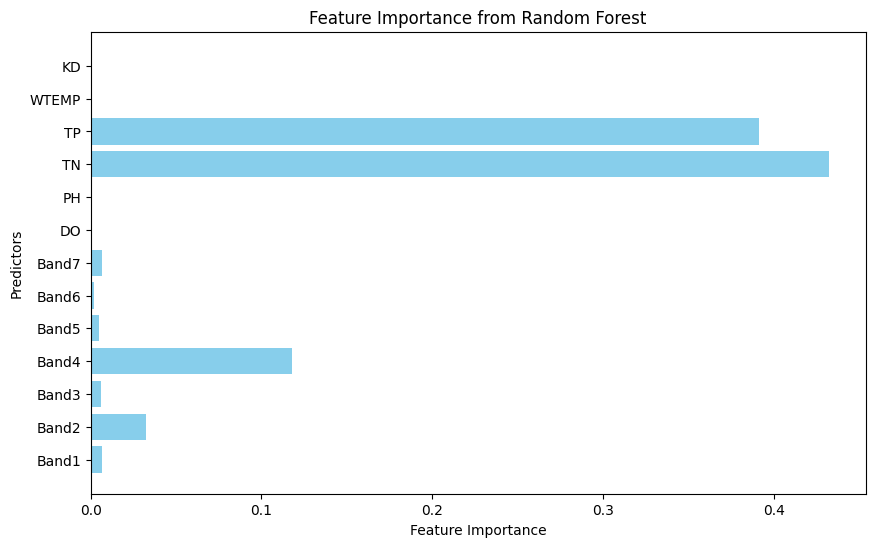

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(predictors, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Predictors')
plt.title('Feature Importance from Random Forest')
plt.show()

In [ ]:
# Saving model outputs for second model
import pickle
with open('rf_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

# Figures
## This section focuses on the figures for this project.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

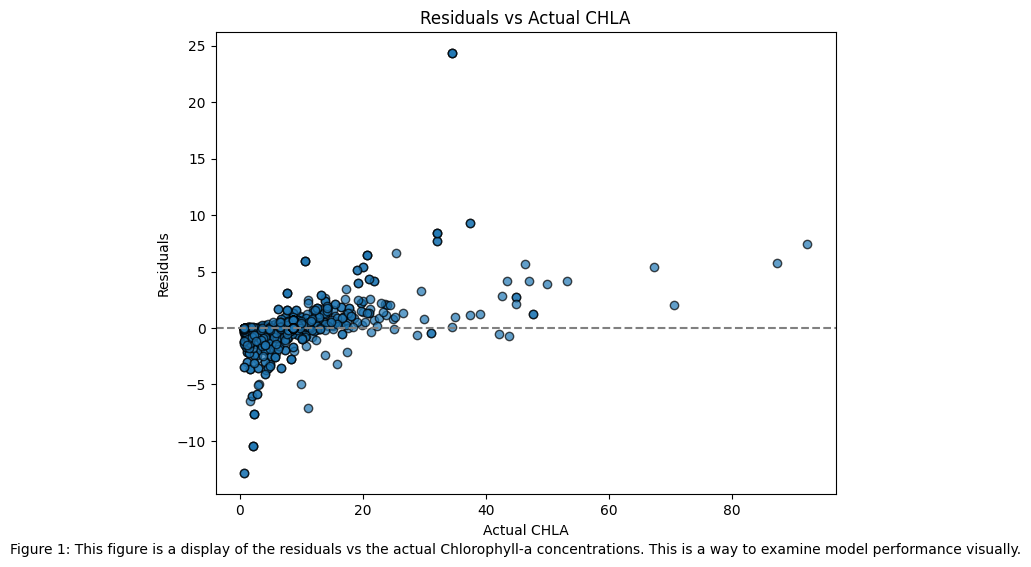

In [ ]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Actual CHLA')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual CHLA')
plt.figtext(0.5, 0.01,
            'Figure 1: This figure is a display of the residuals vs the actual Chlorophyll-a concentrations. This is a way to examine model performance visually.',
            ha='center', fontsize=10)

# save and download figures
from google.colab import files
plt.savefig('figure1.png', dpi = 300, bbox_inches = 'tight')
files.download('figure1.png')


plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

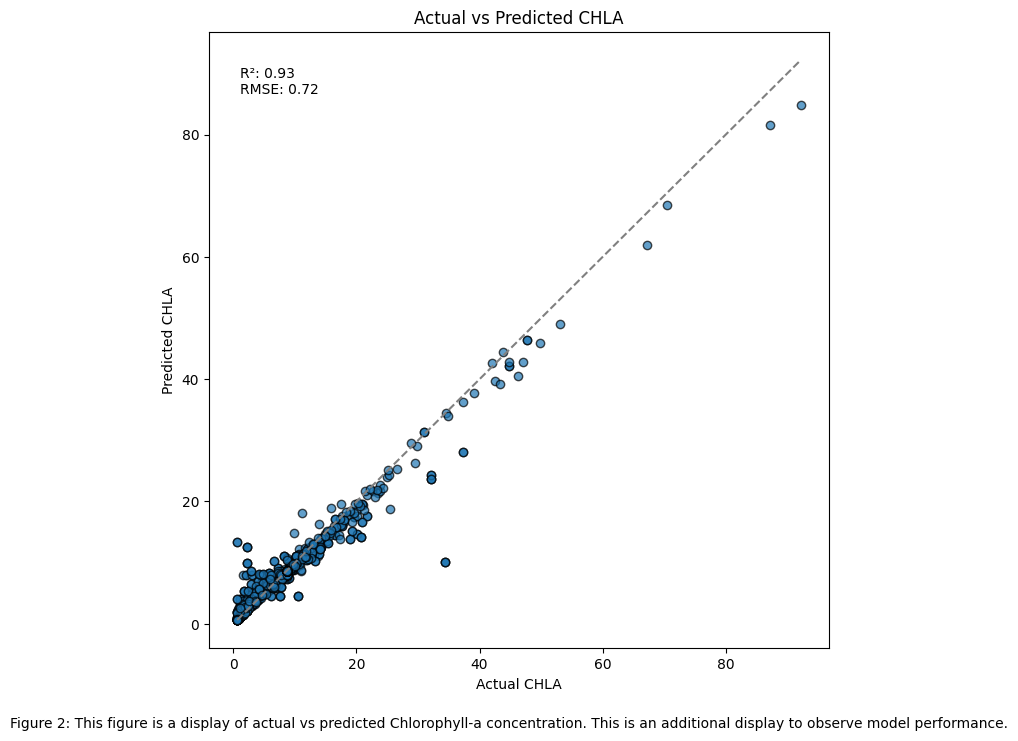

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='gray')
plt.xlabel('Actual CHLA')
plt.ylabel('Predicted CHLA')
plt.title('Actual vs Predicted CHLA')
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
plt.text(0.05, 0.9, f"R²: {r2:.2f}\nRMSE: {rmse:.2f}", transform=plt.gca().transAxes)
plt.figtext(0.5, 0.01, 'Figure 2: This figure is a display of actual vs predicted Chlorophyll-a concentration. This is an additional display to observe model performance.', ha='center', fontsize=10)

# save and download figures
from google.colab import files
plt.savefig('figure2.png', dpi = 300, bbox_inches = 'tight')
files.download('figure2.png')

plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

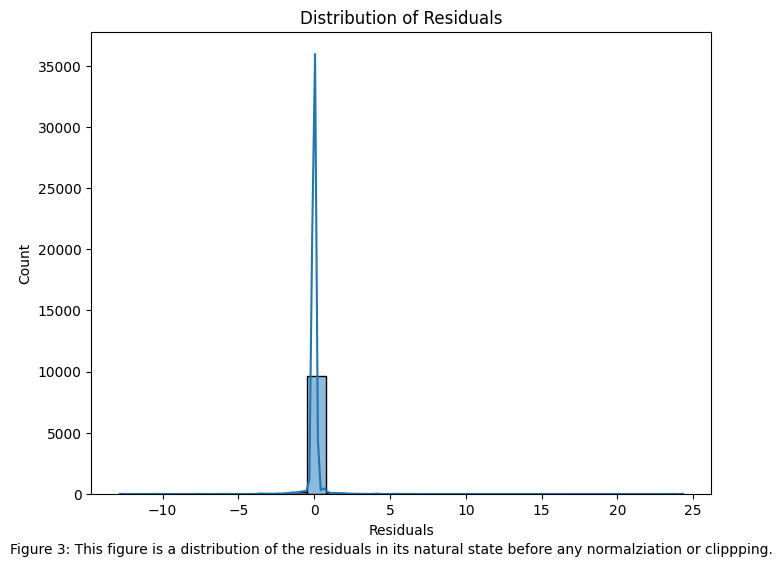

In [ ]:
import seaborn as sns

# Calculating residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.figtext(0.5, 0.01, 'Figure 3: This figure is a distribution of the residuals in its natural state before any normalziation or clippping.', ha='center', fontsize=10)

# save and download figures
from google.colab import files
plt.savefig('figure3.png')
files.download('figure3.png')

plt.show()

count    1.001600e+04
mean     6.127374e-03
std      7.180664e-01
min     -1.283699e+01
25%      2.126299e-12
50%      2.222222e-12
75%      2.229328e-12
max      2.434760e+01
Name: CHLA, dtype: float64
Number of outliers: 118


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

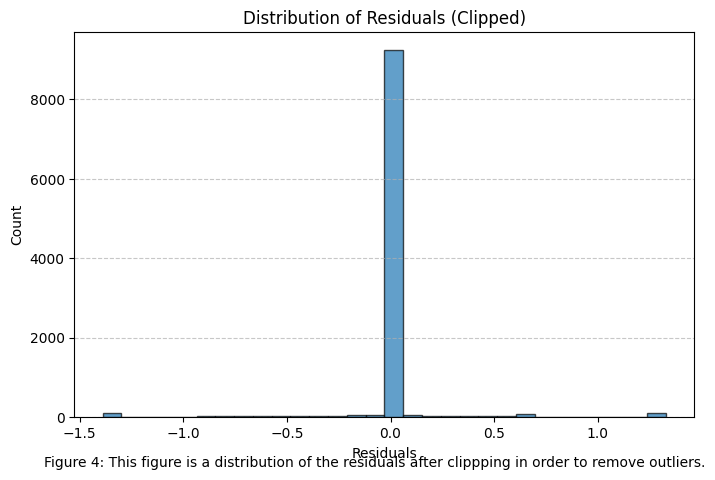

In [ ]:
import numpy as np

# Display summary statistics
print(residuals.describe())

# Identify outliers (e.g., residuals > 3 standard deviations)
outliers = residuals[np.abs(residuals - np.mean(residuals)) > 3 * np.std(residuals)]
print(f"Number of outliers: {len(outliers)}")

# Clip residuals to a specified range
residuals_clipped = residuals.clip(lower=np.percentile(residuals, 1), upper=np.percentile(residuals, 99))

from scipy.stats import boxcox

import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(residuals_clipped, bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of Residuals (Clipped)')
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figtext(0.5, 0.01, 'Figure 4: This figure is a distribution of the residuals after clippping in order to remove outliers.', ha='center', fontsize=10)

# save and download figures
from google.colab import files
plt.savefig('figure4.png')
files.download('figure4.png')

plt.show()

<ipython-input-72-6a04e0c401dc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Value", data=metrics, palette="coolwarm")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

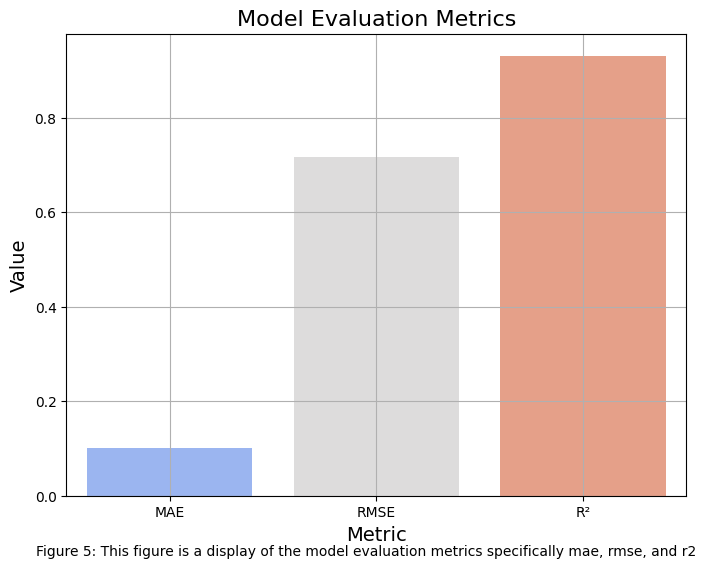

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Plot metrics
metrics = pd.DataFrame({"Metric": ["MAE", "RMSE", "R²"], "Value": [mae, rmse, r2]})
plt.figure(figsize=(8, 6))
sns.barplot(x="Metric", y="Value", data=metrics, palette="coolwarm")
plt.title("Model Evaluation Metrics", fontsize=16)
plt.ylabel("Value", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.figtext(0.5, 0.01, 'Figure 5: This figure is a display of the model evaluation metrics specifically mae, rmse, and r2', ha='center', fontsize=10)
plt.grid()

# save and download figures
from google.colab import files
plt.savefig('figure5.png')
files.download('figure5.png')


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

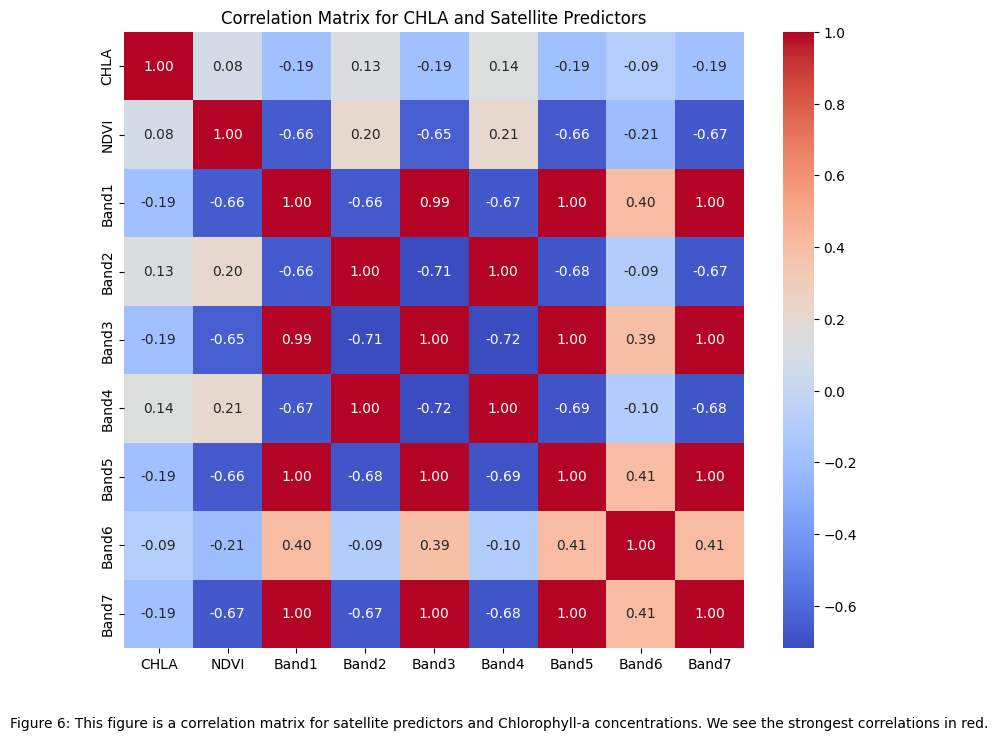

In [ ]:
# Correlation matrix - satellite
import seaborn as sns

plt.figure(figsize=(10, 8))
corr = final_gdf[['CHLA', 'NDVI', 'Band1', 'Band2', 'Band3', 'Band4', 'Band5', 'Band6', 'Band7']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figtext(0.5, 0.01, 'Figure 6: This figure is a correlation matrix for satellite predictors and Chlorophyll-a concentrations. We see the strongest correlations in red.', ha='center', fontsize=10)
plt.title("Correlation Matrix for CHLA and Satellite Predictors")

# save and download figures
from google.colab import files
plt.savefig('figure6.png')
files.download('figure6.png')


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

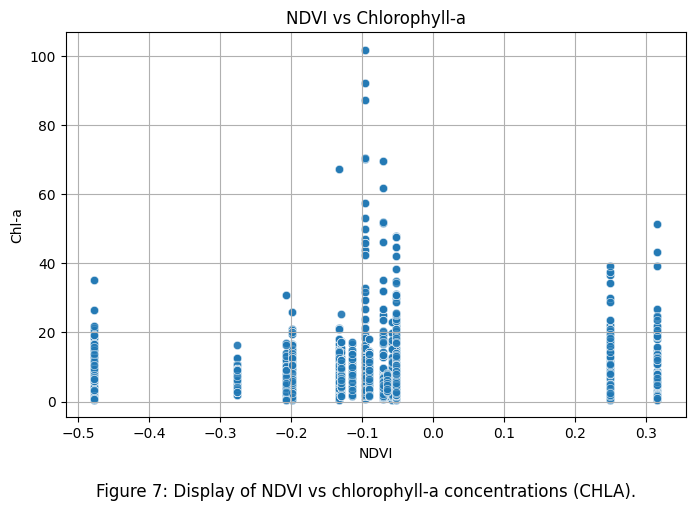

In [ ]:
# Scatter plot for NDVI vs Chl-a
plt.figure(figsize=(8, 5))  # This creates the figure
sns.scatterplot(data=final_gdf, x='NDVI', y='CHLA', alpha=0.7)
plt.title("NDVI vs Chlorophyll-a")
plt.xlabel("NDVI")
plt.ylabel("Chl-a")
plt.grid()
plt.figtext(0.5, -0.05, 'Figure 7: Display of NDVI vs chlorophyll-a concentrations (CHLA).',
            ha='center', fontsize=12)

# save and download figures
from google.colab import files
plt.savefig('figure7.png', dpi = 300, bbox_inches = 'tight')
files.download('figure7.png')


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

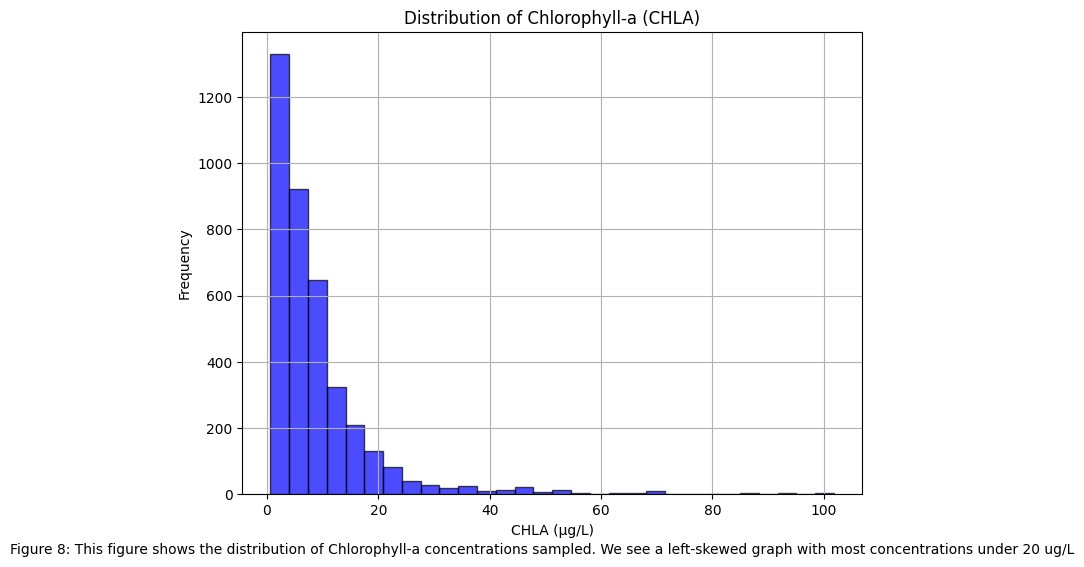

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(final_gdf['CHLA'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribution of Chlorophyll-a (CHLA)")
plt.xlabel("CHLA (µg/L)")
plt.ylabel("Frequency")
plt.figtext(0.5, 0.01, 'Figure 8: This figure shows the distribution of Chlorophyll-a concentrations sampled. We see a left-skewed graph with most concentrations under 20 ug/L', ha='center', fontsize=10)
plt.grid()

# save and download figures
from google.colab import files
plt.savefig('figure8.png', dpi = 300, bbox_inches = 'tight')
files.download('figure8.png')


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

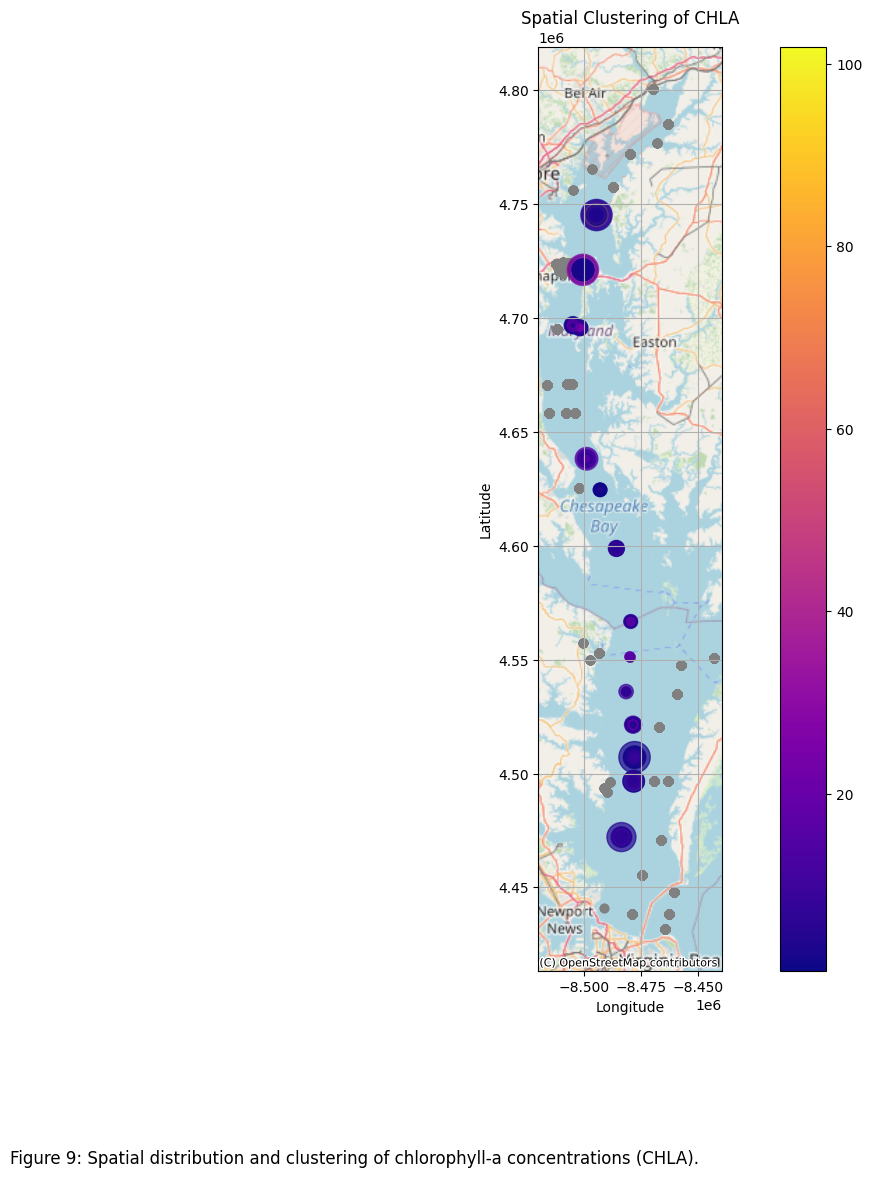

In [ ]:
!pip install contextily
import contextily as ctx

# Bubble map
fig, ax = plt.subplots(figsize=(15, 12))
final_gdf.plot(ax=ax, alpha=0.5, color='grey')  # Base map
final_gdf.plot(ax=ax, column='CHLA', cmap='plasma', legend=True, markersize=final_gdf['CHLA']*5, alpha=0.7)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)


plt.title("Spatial Clustering of CHLA")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
fig.text(0.5, -0.05, 'Figure 9: Spatial distribution and clustering of chlorophyll-a concentrations (CHLA).',
         ha='center', fontsize=12)

# save and download figures
from google.colab import files
plt.savefig('figure9.png', dpi = 300, bbox_inches = 'tight')
files.download('figure9.png')


plt.show()

<ipython-input-79-81aa05a53098>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=final_gdf['Month'], y=final_gdf['CHLA'], palette='coolwarm')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

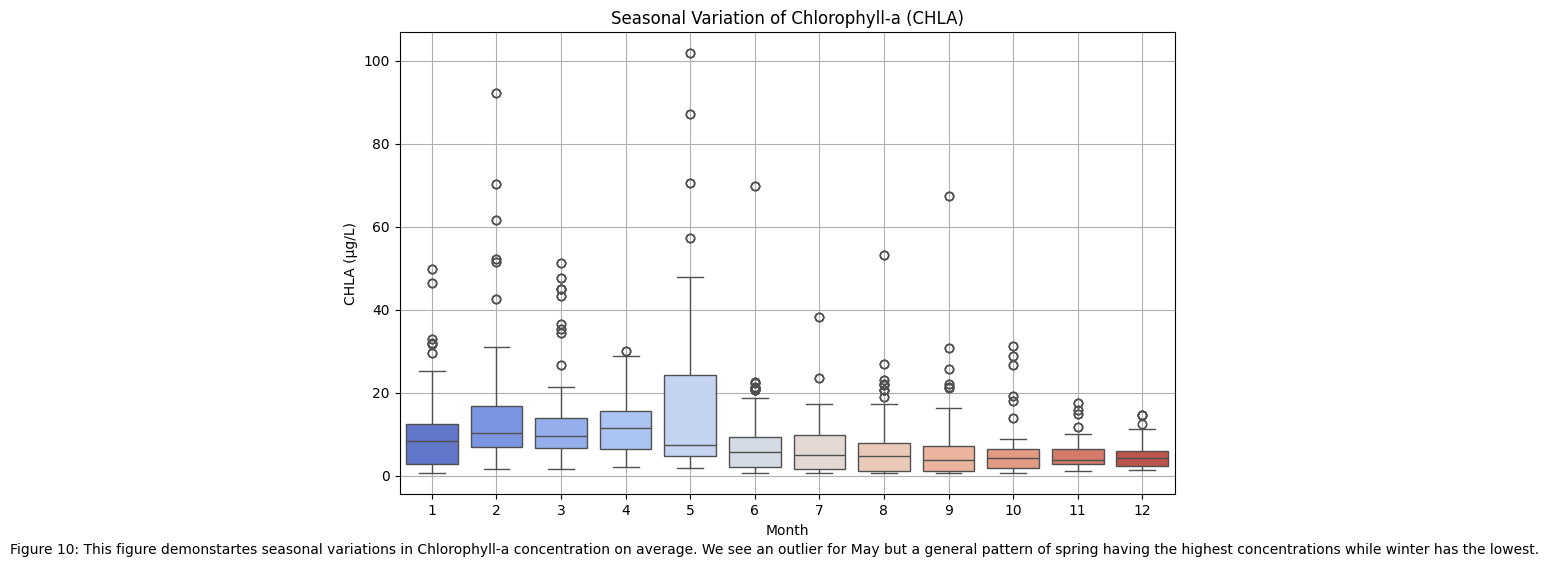

In [ ]:
final_gdf['Month'] = pd.to_datetime(final_gdf['SampleDate']).dt.month

# Boxplot for seasonal variation
plt.figure(figsize=(10, 6))
sns.boxplot(x=final_gdf['Month'], y=final_gdf['CHLA'], palette='coolwarm')
plt.title("Seasonal Variation of Chlorophyll-a (CHLA)")
plt.xlabel("Month")
plt.ylabel("CHLA (µg/L)")
plt.figtext(0.5, 0.01, 'Figure 10: This figure demonstartes seasonal variations in Chlorophyll-a concentration on average. We see an outlier for May but a general pattern of spring having the highest concentrations while winter has the lowest.', ha='center', fontsize=10)
plt.grid()

# save and download figures
from google.colab import files
plt.savefig('figure10.png', dpi = 300, bbox_inches = 'tight')
files.download('figure10.png')



plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

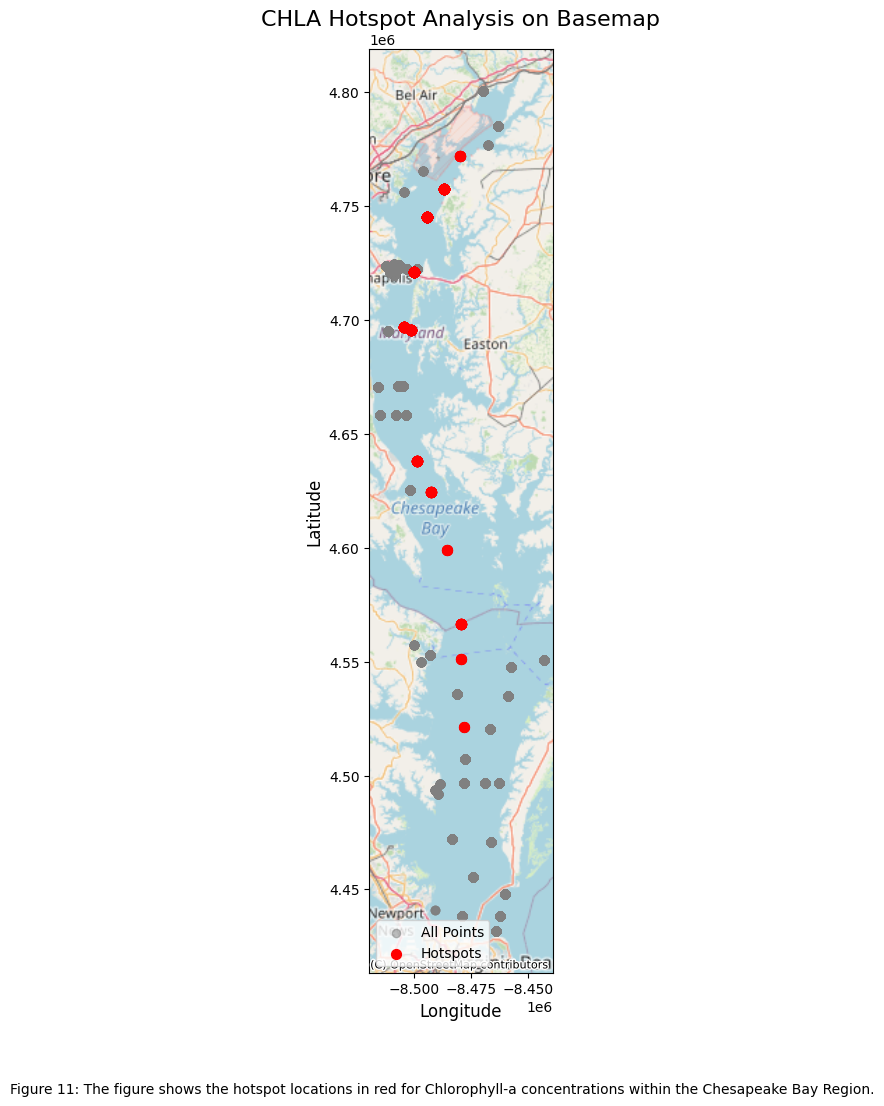

In [ ]:
# Ensure final_gdf is in the Web Mercator projection (EPSG:3857)
final_gdf = final_gdf.to_crs(epsg=3857)

# Filter hotspots (e.g., CHLA > 90th percentile)
hotspots = final_gdf[final_gdf['CHLA'] > final_gdf['CHLA'].quantile(0.9)]

# Plot the data
fig, ax = plt.subplots(figsize=(15, 12))
final_gdf.plot(ax=ax, color='grey', alpha=0.5, label="All Points")  # Base layer
hotspots.plot(ax=ax, color='red', markersize=50, label="Hotspots")  # Hotspots layer

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add title, legend, and labels
plt.title("CHLA Hotspot Analysis on Basemap", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.figtext(0.5, 0.01, 'Figure 11: The figure shows the hotspot locations in red for Chlorophyll-a concentrations within the Chesapeake Bay Region.', ha='center', fontsize=10)
plt.legend()

# save and download figures
from google.colab import files
plt.savefig('figure11.png')
files.download('figure11.png')


plt.show()